In [ ]:
%cd /content/drive/My Drive/


/content/drive/My Drive


In [ ]:
#!unzip covid-ct.zip

In [ ]:
 #!pip install split-folders

In [ ]:
# import splitfolders   # or import split_folders
# input_folder='Covid-CT/'
    # Split with a ratio.
    # To only split into training(80%), testing(10%), and validation(10%) set, using 'ratio' i.e (.8, .1, .1) 
 # splitfolders.ratio(input_folder, output="split-ct", seed=1337, ratio=(.8, .1, .1))

# import splitfolders
# splitfolders.ratio("Covid-CT/", output="split-ct", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

In [ ]:
#!pip install split-folders


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255
                                   #horizontal_flip=True, vertical_flip=True, 
                                   #rotation_range=15,shear_range=15,
                                   #zoom_range=0.15
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "split-ct/train",
        target_size=(224, 224),
        batch_size=8,
        class_mode='categorical'
        )
 
validation_generator = validation_datagen.flow_from_directory(
        'split-ct/val',
        target_size=(224, 224),
        batch_size=8,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'split-ct/test',
        target_size=(224, 224),
        batch_size=8,
        class_mode='categorical',
        shuffle=False)

Found 1984 images belonging to 2 classes.
Found 247 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


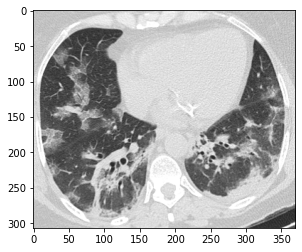

In [ ]:
import matplotlib.pyplot as plt
import cv2
pos_img=cv2.imread('/content/drive/My Drive/covid-ct/COVID/Covid (10).png')
plt.imshow(pos_img)

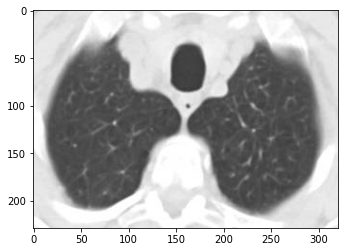

In [ ]:
neg_img=cv2.imread('/content/drive/My Drive/covid-ct/non-COVID/Non-Covid (1).png')
plt.imshow(neg_img)


In [ ]:
#from keras.applications import NASNetLarge
from tensorflow.keras.applications import NASNetLarge
from keras.models import Model
base_model = NASNetLarge(include_top=False, 
                   weights='imagenet', 
                   input_shape=(331, 331, 3))

In [ ]:
base_model.trainable = False


In [ ]:
from keras import models
from keras import layers
# Create the model
model = models.Sequential()
# Add the inception convolutional base model
model.add(base_model)

# Add new layers

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(2, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 4032)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 8066      
Total params: 84,924,884
Trainable params: 8,066
Non-trainable params: 84,916,818
_________________________________________________________________


In [ ]:
from keras.optimizers import *
#adam = Adam(lr=0.0001)
#sgd = SGD(lr=0.0001)
#rmsprop = RMSprop(lr=0.001)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
#model.compile(adam, loss='categorical_crossentropy', metrics=['acc'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# Train the model 
epochs = 10
history=model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size,
        verbose=1)

Epoch 1/10
248/248 [==============================] - 34s 138ms/step - loss: 0.4517 - acc: 0.7797 - val_loss: 0.3549 - val_acc: 0.8500
Epoch 2/10
248/248 [==============================] - 30s 122ms/step - loss: 0.3126 - acc: 0.8695 - val_loss: 0.3046 - val_acc: 0.8542
Epoch 3/10
248/248 [==============================] - 31s 123ms/step - loss: 0.2608 - acc: 0.8947 - val_loss: 0.2305 - val_acc: 0.8958
Epoch 4/10
248/248 [==============================] - 31s 124ms/step - loss: 0.2155 - acc: 0.9178 - val_loss: 0.2214 - val_acc: 0.9375
Epoch 5/10
248/248 [==============================] - 31s 126ms/step - loss: 0.1905 - acc: 0.9294 - val_loss: 0.2190 - val_acc: 0.9375
Epoch 6/10
248/248 [==============================] - 31s 127ms/step - loss: 0.1675 - acc: 0.9390 - val_loss: 0.2807 - val_acc: 0.9000
Epoch 7/10
248/248 [==============================] - 32s 127ms/step - loss: 0.1504 - acc: 0.9430 - val_loss: 0.2490 - val_acc: 0.9250
Epoch 8/10
248/248 [==============================] - 3

In [ ]:
model.evaluate(test_generator)

32/32 [==============================] - 4s 117ms/step - loss: 0.2485 - acc: 0.9160


[0.2484588623046875, 0.9160000085830688]

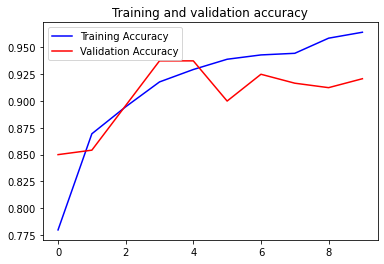

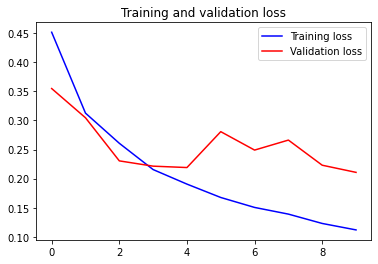

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
y_prob=model.predict_classes(test_generator)
y_prob

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_true = test_generator.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
test_generator.class_indices

{'COVID': 0, 'non-COVID': 1}

In [ ]:
test_generator.filenames

['COVID/Covid (1020).png',
 'COVID/Covid (103).png',
 'COVID/Covid (1030).png',
 'COVID/Covid (1043).png',
 'COVID/Covid (1053).png',
 'COVID/Covid (1070).png',
 'COVID/Covid (1077).png',
 'COVID/Covid (1079).png',
 'COVID/Covid (1082).png',
 'COVID/Covid (1091).png',
 'COVID/Covid (1097).png',
 'COVID/Covid (1098).png',
 'COVID/Covid (1100).png',
 'COVID/Covid (1106).png',
 'COVID/Covid (1118).png',
 'COVID/Covid (1120).png',
 'COVID/Covid (1121).png',
 'COVID/Covid (1124).png',
 'COVID/Covid (1130).png',
 'COVID/Covid (1142).png',
 'COVID/Covid (1191).png',
 'COVID/Covid (12).png',
 'COVID/Covid (1216).png',
 'COVID/Covid (1239).png',
 'COVID/Covid (1249).png',
 'COVID/Covid (148).png',
 'COVID/Covid (158).png',
 'COVID/Covid (164).png',
 'COVID/Covid (166).png',
 'COVID/Covid (177).png',
 'COVID/Covid (185).png',
 'COVID/Covid (187).png',
 'COVID/Covid (204).png',
 'COVID/Covid (211).png',
 'COVID/Covid (224).png',
 'COVID/Covid (225).png',
 'COVID/Covid (23).png',
 'COVID/Covid (23

In [ ]:
image=cv2.imread('covid_dataset/positive/wong-0004.jpg')
image.shape

(299, 299, 3)

In [ ]:
y_pre=model.predict(image.reshape(1,299,299,3))
y_pre

array([[2.9909634e-04, 9.9970090e-01]], dtype=float32)